## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import bootcampviztools as bt
import funciones as fs
import seaborn as sns
import re

## Datos

In [34]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col= 0)
df.index.name = None

## Exploración de los datos

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [36]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00


In [37]:
df.Price_in_euros.value_counts()

Price_in_euros
1799.00    11
499.00     10
1499.00    10
1099.00     9
1399.00     8
           ..
1369.90     1
2729.00     1
599.90      1
639.01      1
2456.34     1
Name: count, Length: 603, dtype: int64

In [38]:
df.Inches.value_counts()

Inches
15.6    453
14.0    150
13.3    114
17.3    113
11.6     28
12.5     27
13.5      5
12.0      4
15.0      3
13.9      3
15.4      3
10.1      2
13.0      2
12.3      2
14.1      1
11.3      1
18.4      1
Name: count, dtype: int64

In [39]:
import pandas as pd


# Detección de valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)

# Detección de valores duplicados
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

# Mostrar filas con valores nulos
filas_con_nulos = df[df.isnull().any(axis=1)]
print("Filas con valores nulos:\n", filas_con_nulos)

# Mostrar filas duplicadas
filas_duplicadas = df[df.duplicated()]
print("Filas duplicadas:\n", filas_duplicadas)

# Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()
print("Número de filas después de eliminar duplicados:", len(df_sin_duplicados))


Valores nulos por columna:
 Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
dtype: int64
Número de filas duplicadas: 21
Filas con valores nulos:
 Empty DataFrame
Columns: [Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_in_euros]
Index: []
Filas duplicadas:
      Company                                    Product            TypeName  \
1302  Lenovo                             Yoga 500-14ISK  2 in 1 Convertible   
1285    Dell                              Inspiron 3567            Notebook   
1289  Lenovo                             Yoga 900-13ISK  2 in 1 Convertible   
1311  Lenovo                         IdeaPad Y700-15ISK            Notebook   
1306    Asus        X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   
1

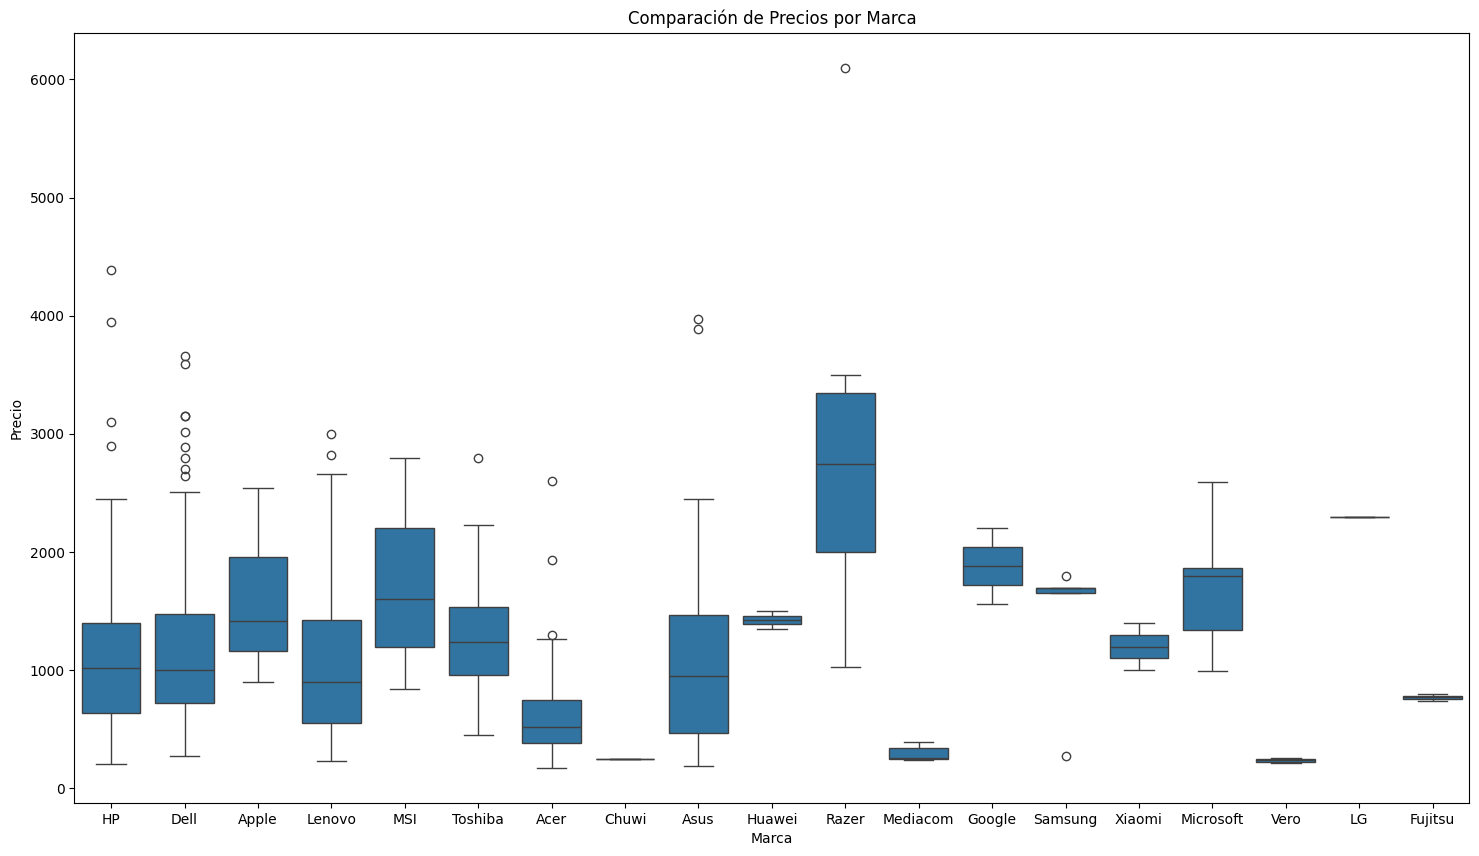

In [40]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(18, 10))

sns.boxplot(x='Company', y='Price_in_euros', data=df, )
plt.title('Comparación de Precios por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.show()

In [41]:
df.Company.value_counts(normalize=True)

Company
Lenovo       0.221491
Dell         0.216009
HP           0.212719
Asus         0.132675
Acer         0.081140
MSI          0.040570
Toshiba      0.037281
Apple        0.018640
Razer        0.006579
Mediacom     0.006579
Microsoft    0.005482
Samsung      0.005482
Xiaomi       0.003289
Vero         0.002193
Huawei       0.002193
Google       0.002193
Chuwi        0.002193
Fujitsu      0.002193
LG           0.001096
Name: proportion, dtype: float64

In [42]:
# 1️⃣ Convertir nombres de columnas a minúsculas y eliminar espacios
df.columns = df.columns.str.strip().str.lower()

# 2️⃣ Limpiar espacios extra y convertir valores de texto a minúsculas
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# 3️⃣ Reemplazar caracteres especiales (como "<U+039C>" en GPU)
df['gpu'] = df['gpu'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# 4️⃣ Convertir la columna 'price_in_euros' a numérica
df['price_in_euros'] = pd.to_numeric(df['price_in_euros'], errors='coerce')

# Mostrar primeras filas para verificar limpieza
print(df.head())


    company        product   typename  inches   screenresolution  \
755      hp         250 g6   notebook    15.6  full hd 1920x1080   
618    dell  inspiron 7559     gaming    15.6  full hd 1920x1080   
909      hp    probook 450   notebook    15.6  full hd 1920x1080   
2     apple    macbook air  ultrabook    13.3           1440x900   
286    dell  inspiron 3567   notebook    15.6  full hd 1920x1080   

                             cpu   ram               memory  \
755     intel core i3 6006u 2ghz   8gb            256gb ssd   
618  intel core i7 6700hq 2.6ghz  16gb              1tb hdd   
909   intel core i7 7500u 2.7ghz   8gb              1tb hdd   
2           intel core i5 1.8ghz   8gb  128gb flash storage   
286   intel core i3 6006u 2.0ghz   4gb              1tb hdd   

                             gpu       opsys  weight  price_in_euros  
755        intel hd graphics 520  windows 10  1.86kg          539.00  
618  nvidia geforce gtx 960u039c  windows 10  2.59kg          879.01  

C:\Users\josel\AppData\Local\Temp\ipykernel_19868\2503989374.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [43]:
fs.describe_df(df)

COL_N,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,447,6,17,36,105,9,37,89,9,165,603
CARDIN (%),0.02,0.49,0.01,0.02,0.04,0.12,0.01,0.04,0.1,0.01,0.18,0.66


In [44]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros
755,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.86kg,539.00
618,dell,inspiron 7559,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,16gb,1tb hdd,nvidia geforce gtx 960u039c,windows 10,2.59kg,879.01
909,hp,probook 450,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8gb,1tb hdd,nvidia geforce 930mx,windows 10,2.04kg,900.00
2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94
286,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2.0ghz,4gb,1tb hdd,amd radeon r5 m430,linux,2.25kg,428.00


In [45]:
df.tail()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros
28,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8gb,256gb ssd,amd radeon 530,windows 10,2.2kg,800.00
1160,hp,spectre pro,2 in 1 convertible,13.3,full hd / touchscreen 1920x1080,intel core i5 6300u 2.4ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.48kg,1629.00
78,lenovo,ideapad 320-15ikbn,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,2tb hdd,intel hd graphics 620,no os,2.2kg,519.00
23,hp,255 g6,notebook,15.6,1366x768,amd e-series e2-9000e 1.5ghz,4gb,500gb hdd,amd radeon r2,no os,1.86kg,258.00
229,dell,alienware 17,gaming,17.3,ips panel full hd 1920x1080,intel core i7 7700hq 2.8ghz,16gb,256gb ssd + 1tb hdd,nvidia geforce gtx 1060,windows 10,4.42kg,2456.34


In [46]:
df.describe()

,inches,price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


| **Variable**         | **Descripción**                                                                        |
|----------------------|----------------------------------------------------------------------------------------|
| Company              | Marca del portátil                                                                     |
| Product              | Modelo del portátil                                                                    |
| TypeName             | Tipo de portátil (Notebook, Gaming, Ultrabook, etc.)                                   |
| Inches               | Tamaño de la pantalla en pulgadas                                                      |
| ScreenResolution     | Resolución de la pantalla                                                              |
| Cpu                  | Procesador del portátil                                                                |
| Ram                  | Memoria RAM del portátil                                                               |
| Memory               | Capacidad de almacenamiento (SSD, HDD, Flash Storage, etc.)                            |
| Gpu                  | Tarjeta gráfica del portátil                                                           |
| OpSys                | Sistema operativo del portátil                                                         |
| Weight               | Peso del portátil en kilogramos                                                        |
| Price_in_euros       | Precio del portátil en euros                                                           |


Sin embargo, basándome en la experiencia y el conocimiento del mercado, algunas variables que generalmente tienen un gran impacto en el precio son:

Marca: Algunas marcas son percibidas como de mayor calidad y, por lo tanto, tienen precios más altos (por ejemplo, Apple).

Tipo de portátil: Los portátiles para juegos (Gaming) y los ultrabooks tienden a ser más caros debido a sus características especializadas.

Procesador (Cpu): Los procesadores más potentes (por ejemplo, Intel Core i7, i9) suelen aumentar el precio del equipo.

Memoria RAM (Ram): Más memoria RAM generalmente significa un precio más alto, especialmente si supera los 8GB.

Capacidad de almacenamiento (Memory): Los SSD suelen ser más caros que los HDD, y una mayor capacidad de almacenamiento generalmente aumenta el precio.

Tarjeta gráfica (Gpu): Las tarjetas gráficas dedicadas y de alta gama (por ejemplo, Nvidia GeForce GTX/RTX) pueden incrementar significativamente el precio.

Resolución y tipo de pantalla (ScreenResolution): Pantallas de alta resolución y características adicionales como la tecnología IPS o pantallas táctiles pueden aumentar el precio.

Sistema operativo (OpSys): Los equipos con sistemas operativos preinstalados, especialmente macOS, pueden ser más costosos.

Peso (Weight): Si bien no es una variable directa del precio, los portátiles más livianos y portátiles tienden a ser más caros debido a la tecnología avanzada utilizada para reducir el peso.

In [47]:
target = "price_in_euros"

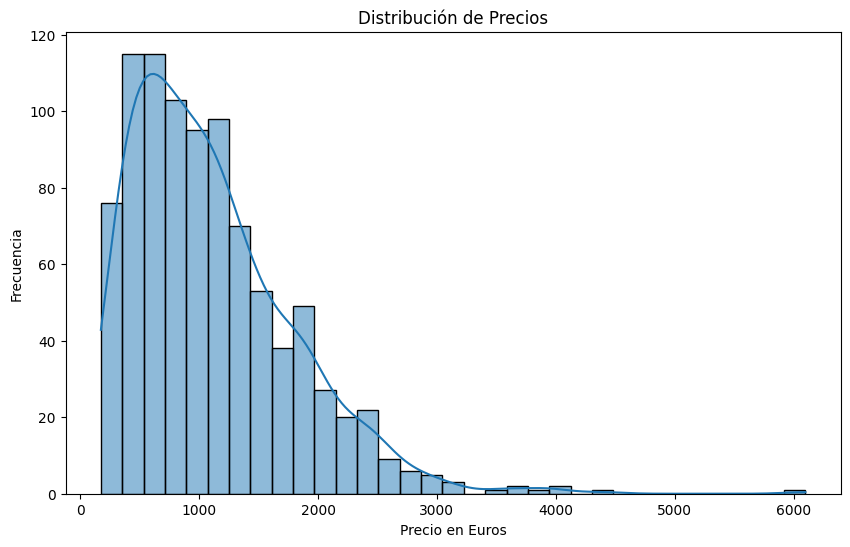

In [48]:
# Histograma del precio
plt.figure(figsize=(10, 6))
sns.histplot(df['price_in_euros'], kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.show()

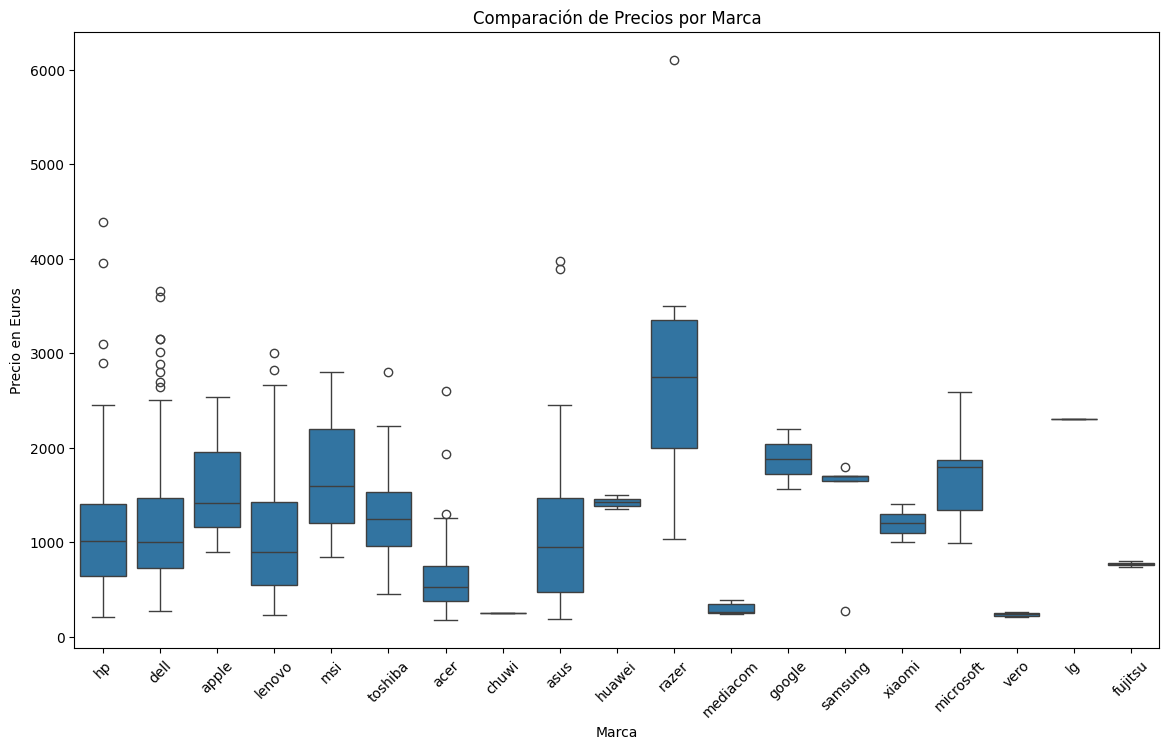

In [49]:


# Boxplot del precio por compañía
plt.figure(figsize=(14, 8))
sns.boxplot(x='company', y='price_in_euros', data=df)
plt.title('Comparación de Precios por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio en Euros')
plt.xticks(rotation=45)
plt.show()






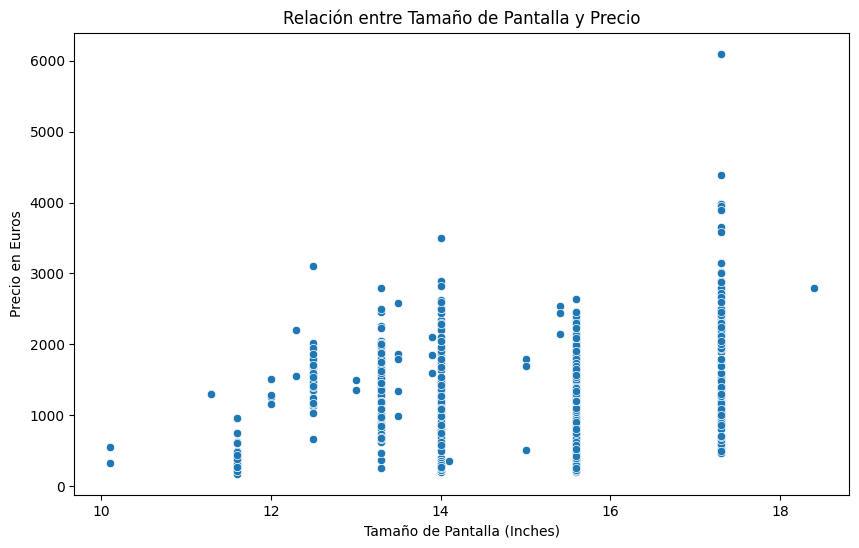

In [50]:


# Diagrama de dispersión entre precio y tamaño de pantalla
plt.figure(figsize=(10, 6))
sns.scatterplot(x='inches', y='price_in_euros', data=df)
plt.title('Relación entre Tamaño de Pantalla y Precio')
plt.xlabel('Tamaño de Pantalla (Inches)')
plt.ylabel('Precio en Euros')
plt.show()




## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [51]:
df["inches"] = df.inches.astype(float)
df['ram_gb'] = df['ram'].str.replace('gb', '').astype(int)
df["weight_kg"] = df['weight'].str.replace('kg', '').astype(float)

In [52]:
# ScreenResolucion contine informacion de si la pantalla es Tactil (Touchscreen) y el tamaño de la pantalla. 

# Función para detectar si es Touchscreen
def es_touchscreen(x):
    return 'touchscreen' in x

# Crear columna Touchscreen
df['touchscreen'] = df['screenresolution'].apply(es_touchscreen)

# Función para extraer solo la resolución de pantalla
def extract_resolution(x):
    if 'touchscreen' in x:
        return x.split(' / ')[-1]
    else:
        return x

# Crear columna con solo la resolución de pantalla
df['screenresolution'] = df['screenresolution'].apply(extract_resolution)

In [53]:
# Analizamos vemos en Memoria que 1.0TB HDD==1TB HDD, vamos a quitar el punto para evitar duplicidades.
# Quitar los puntos en la columna 'Storage'
df['memory'] = df['memory'].str.replace('1.0', '1', regex=False)

In [54]:
# Quitar los espacios extras en la columna 'Gpu'
df['gpu'] = df['gpu'].str.strip()

In [55]:
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,ram_gb,weight_kg,touchscreen
755,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.86kg,539.00,8,1.86,False
618,dell,inspiron 7559,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,16gb,1tb hdd,nvidia geforce gtx 960u039c,windows 10,2.59kg,879.01,16,2.59,False
909,hp,probook 450,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8gb,1tb hdd,nvidia geforce 930mx,windows 10,2.04kg,900.00,8,2.04,False
2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94,8,1.34,False
286,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2.0ghz,4gb,1tb hdd,amd radeon r5 m430,linux,2.25kg,428.00,4,2.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8gb,256gb ssd,amd radeon 530,windows 10,2.2kg,800.00,8,2.20,False
1160,hp,spectre pro,2 in 1 convertible,13.3,touchscreen 1920x1080,intel core i5 6300u 2.4ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.48kg,1629.00,8,1.48,True
78,lenovo,ideapad 320-15ikbn,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,2tb hdd,intel hd graphics 620,no os,2.2kg,519.00,8,2.20,False
23,hp,255 g6,notebook,15.6,1366x768,amd e-series e2-9000e 1.5ghz,4gb,500gb hdd,amd radeon r2,no os,1.86kg,258.00,4,1.86,False


In [56]:

# Extracción de información del cpu
df['cpu_brand'] = df['cpu'].apply(lambda x: x.split()[0])
df['cpu_model'] = df['cpu'].apply(lambda x: ' '.join(x.split()[1:3]))
df['cpu_speed'] = df['cpu'].apply(lambda x: x.split()[-1].replace('ghz', '')).astype(float)



# Extracción de información de la memoria


# Extracción de información de la memoria
df['memory_type'] = df['memory'].apply(lambda x: 'hdd' if 'hdd' in x else 'ssd' if 'ssd' in x else 'flash storage')
df['memory_capacity'] = df['memory'].apply(lambda x: x.split()[0].replace('gb', '').replace('tb', '000').strip()).astype(float)

# Extracción de información de la GPU
df["gpu_brand"] = df['gpu'].apply(lambda x: x.split()[0])
df['gpu_model'] = df['gpu'].apply(lambda x: ' '.join(x.split()[1:]))

# Mostrar el DataFrame con las nuevas columna
df.head()


,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,ram_gb,weight_kg,touchscreen,cpu_brand,cpu_model,cpu_speed,memory_type,memory_capacity,gpu_brand,gpu_model
755,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,...,8,1.86,False,intel,core i3,2.0,ssd,256.0,intel,hd graphics 520
618,dell,inspiron 7559,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,16gb,1tb hdd,nvidia geforce gtx 960u039c,windows 10,...,16,2.59,False,intel,core i7,2.6,hdd,1000.0,nvidia,geforce gtx 960u039c
909,hp,probook 450,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8gb,1tb hdd,nvidia geforce 930mx,windows 10,...,8,2.04,False,intel,core i7,2.7,hdd,1000.0,nvidia,geforce 930mx
2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,...,8,1.34,False,intel,core i5,1.8,flash storage,128.0,intel,hd graphics 6000
286,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2.0ghz,4gb,1tb hdd,amd radeon r5 m430,linux,...,4,2.25,False,intel,core i3,2.0,hdd,1000.0,amd,radeon r5 m430


Text(0.5, 1.0, 'Matriz de Correlación entre Variables Numéricas')

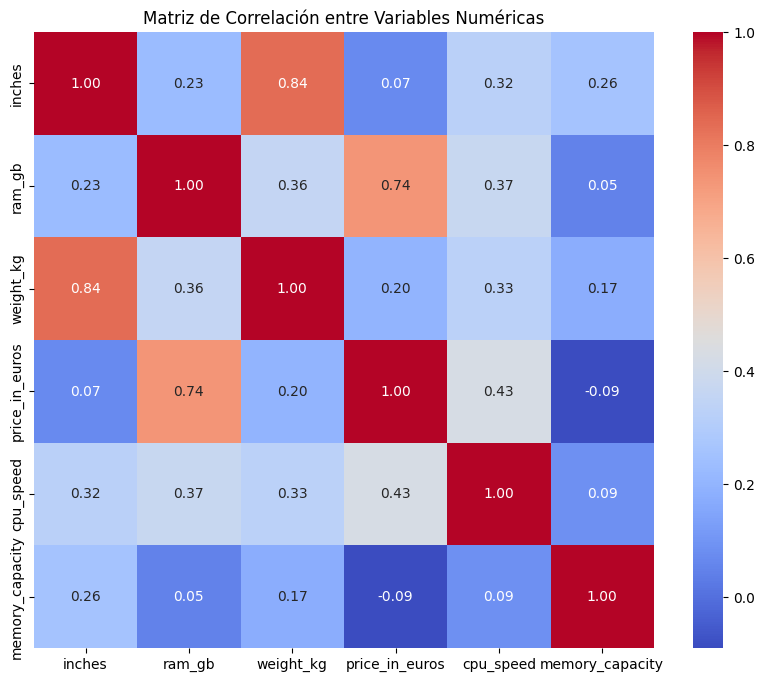

In [57]:
# Selección de variables numéricas
variables_numericas = ['inches', 'ram_gb', 'weight_kg', 'price_in_euros',"cpu_speed", "memory_capacity"]

# Calcular la matriz de correlación
corr_matrix = df[variables_numericas].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')

In [58]:
target = "price_in_euros"
features_num = df.select_dtypes(include=[np.number]).columns.tolist()
features_num.remove(target)
features_num

['inches', 'ram_gb', 'weight_kg', 'cpu_speed', 'memory_capacity']

<Axes: xlabel='inches', ylabel='Count'>

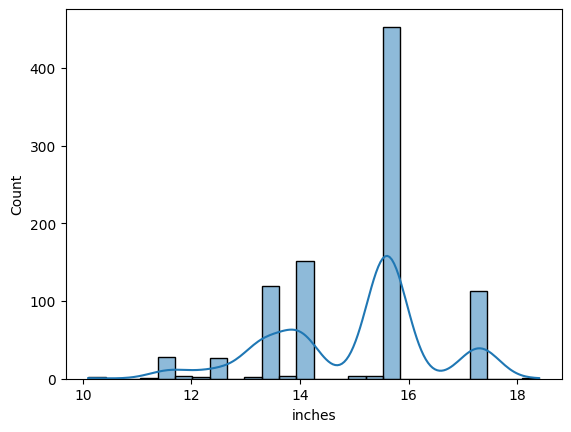

In [59]:
sns.histplot(x= "inches", data=df, kde=True)

In [60]:
# inches es una variable categorica

<Axes: xlabel='ram_gb', ylabel='Count'>

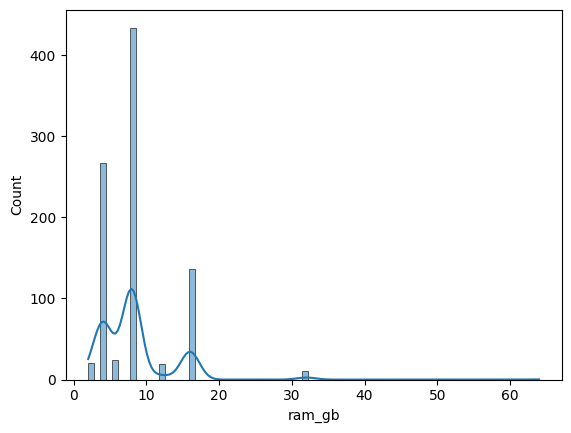

In [61]:
sns.histplot(x= "ram_gb", data=df, kde=True)

In [62]:
# ram_gb es variable categorica

(2,)


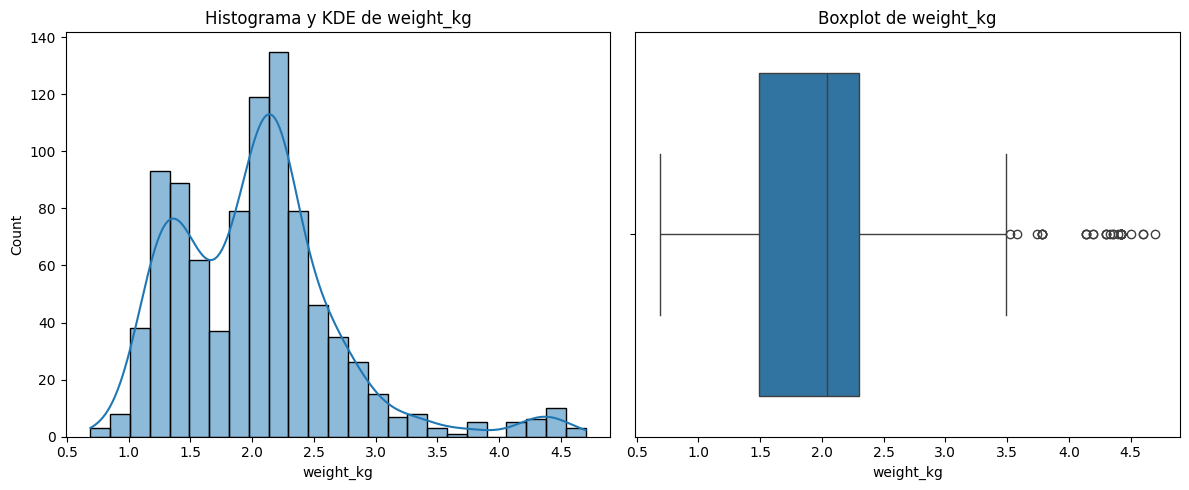

In [63]:
bt.plot_combined_graphs(df, ["weight_kg"])

In [64]:
features_cat = df.select_dtypes(include=[object]).columns.tolist()
features_cat.remove("ram")
features_cat.remove("weight")
features_cat.remove("cpu")
features_cat.remove("gpu")
features_cat.remove("memory")
features_cat.append("touchscreen")
features_cat

['company',
 'product',
 'typename',
 'screenresolution',
 'opsys',
 'cpu_brand',
 'cpu_model',
 'memory_type',
 'gpu_brand',
 'gpu_model',
 'touchscreen']

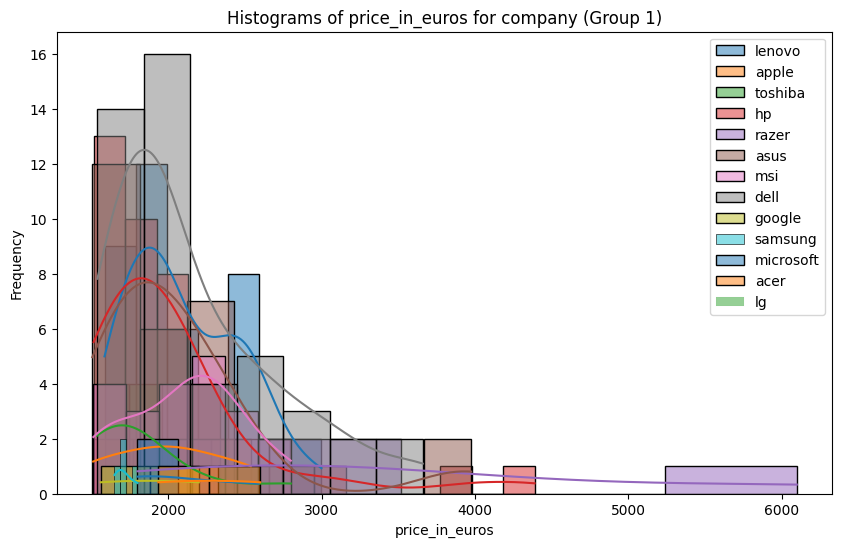

In [65]:
bt.plot_grouped_histograms(df[df[target]>1500], cat_col="company", num_col=target, group_size=len(df["company"].unique()))

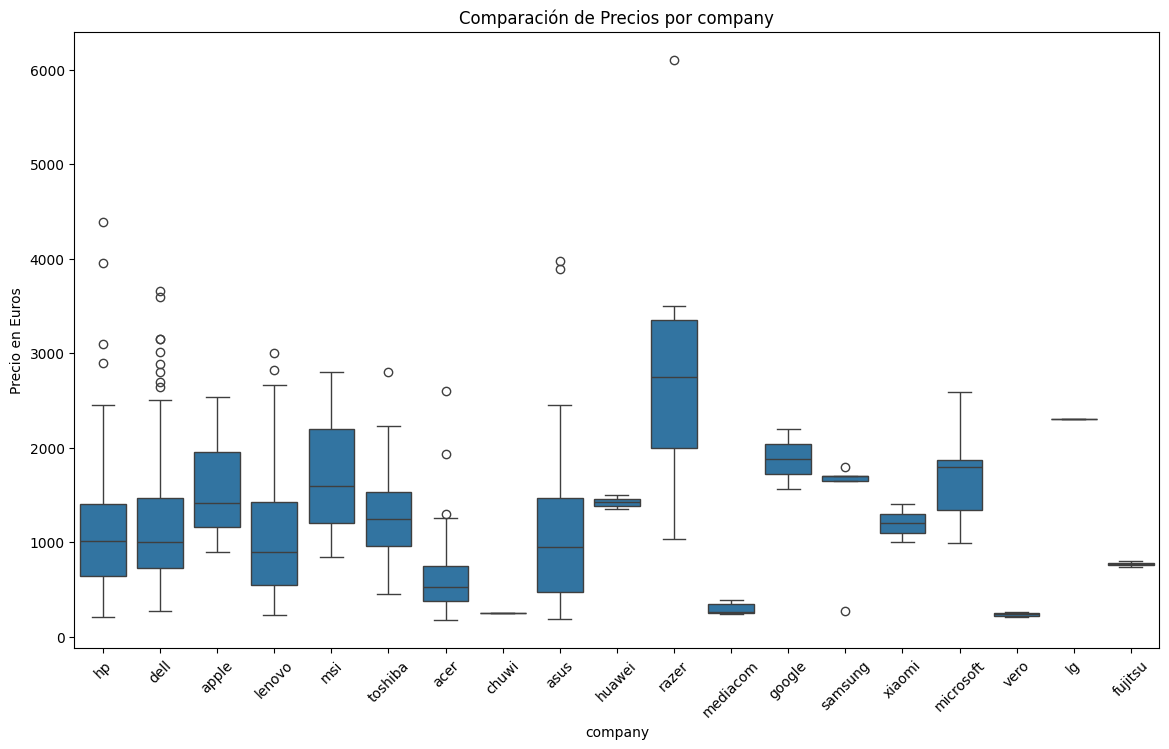

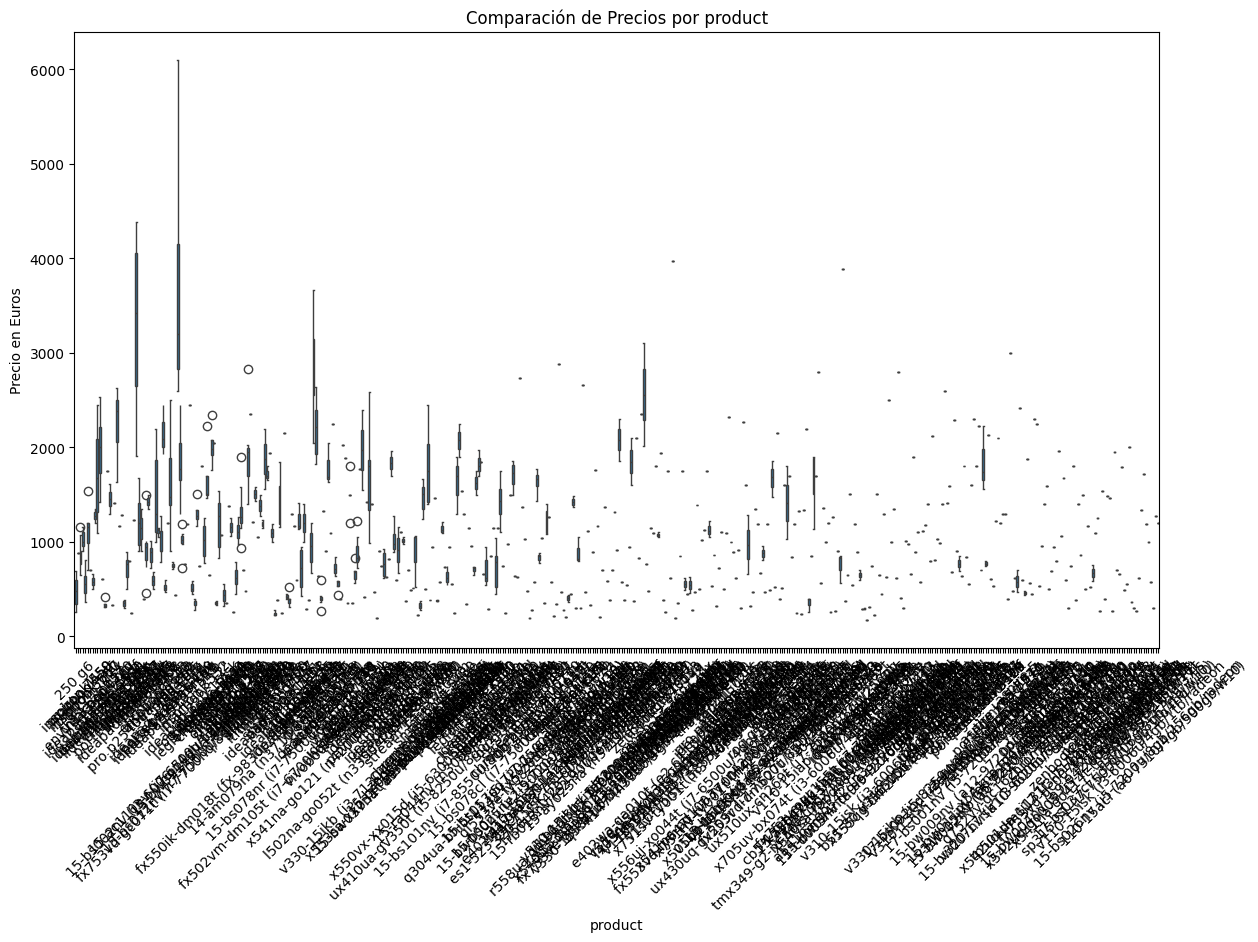

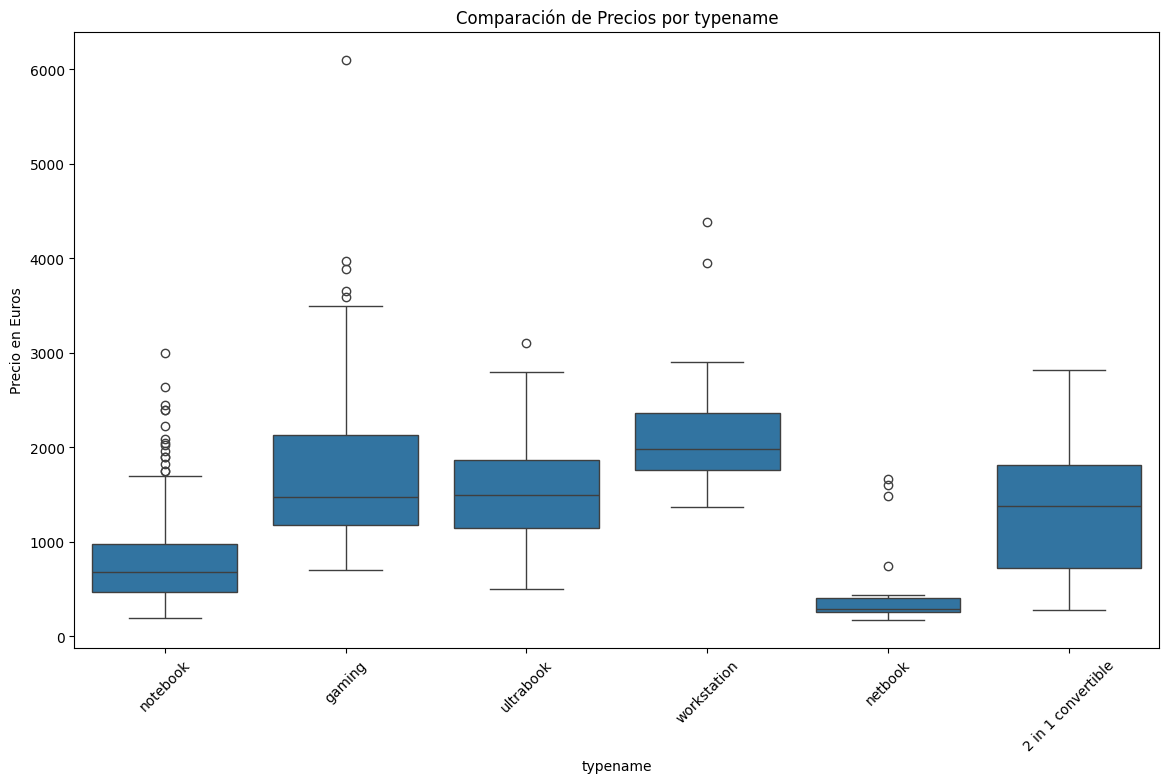

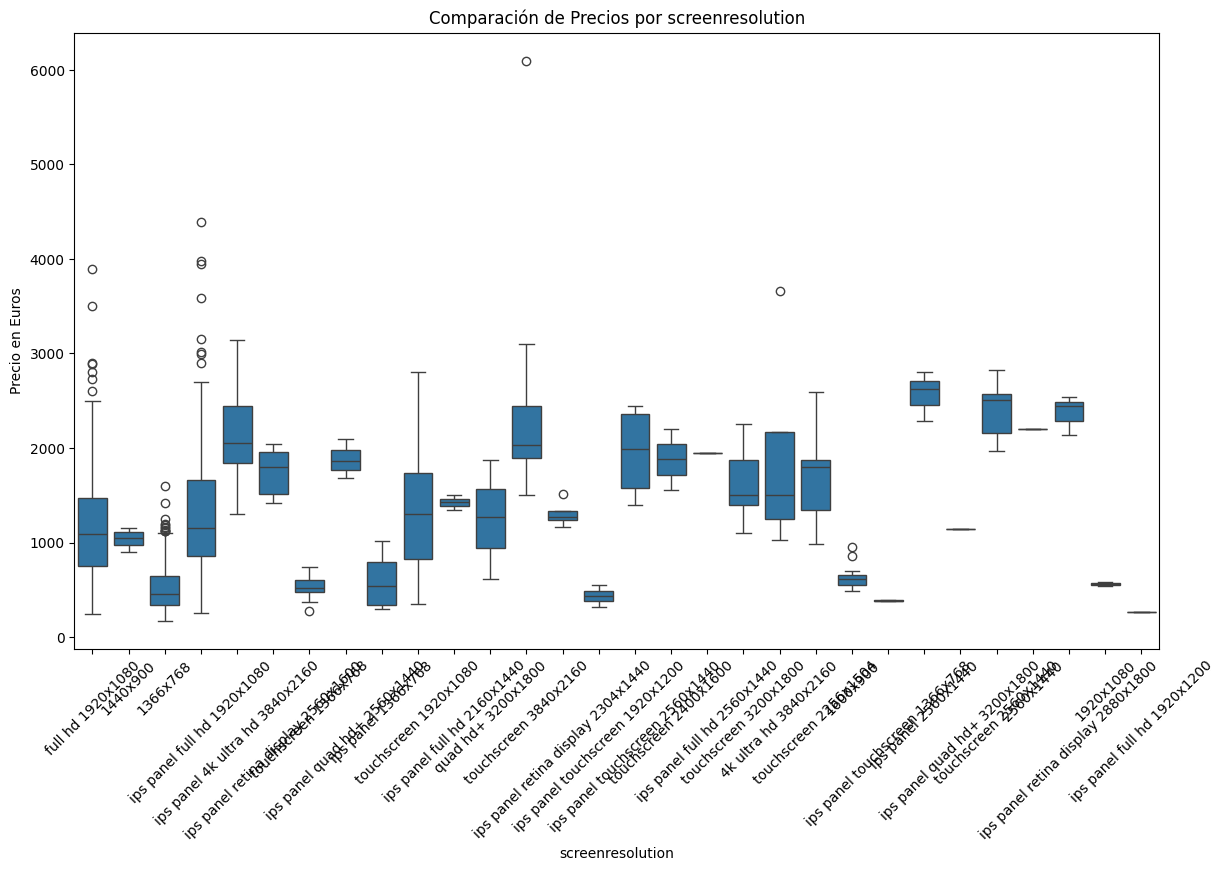

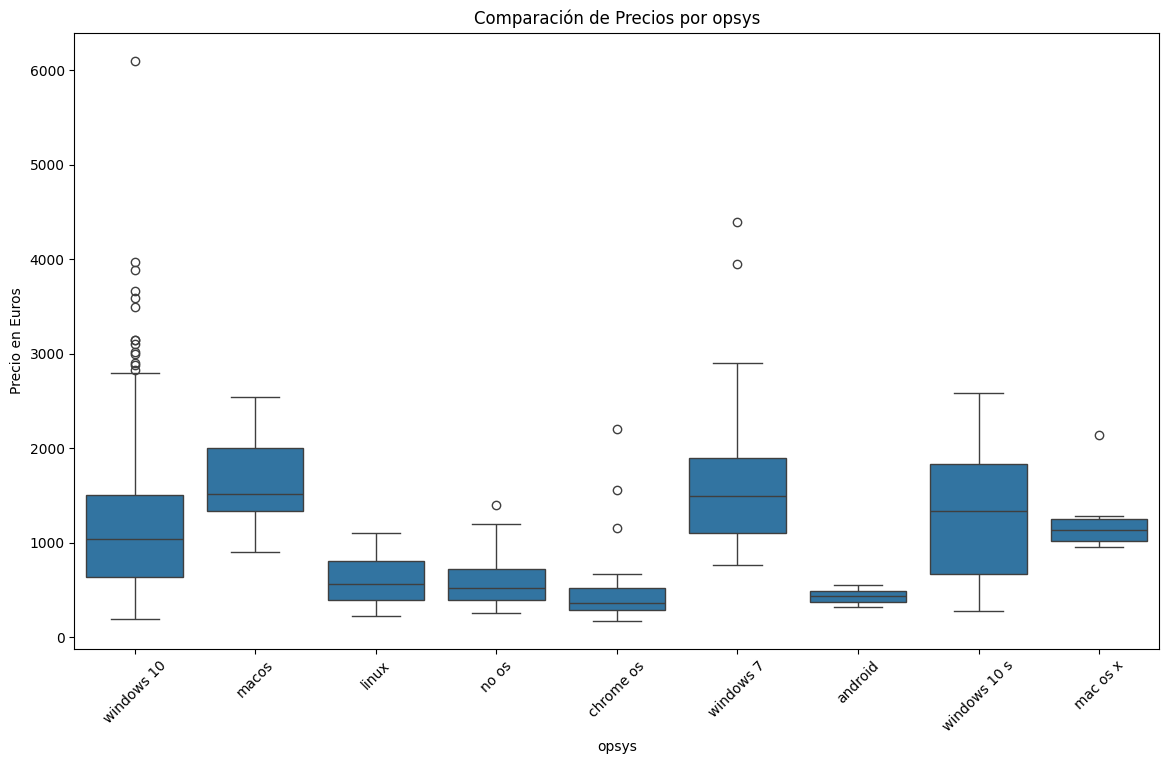

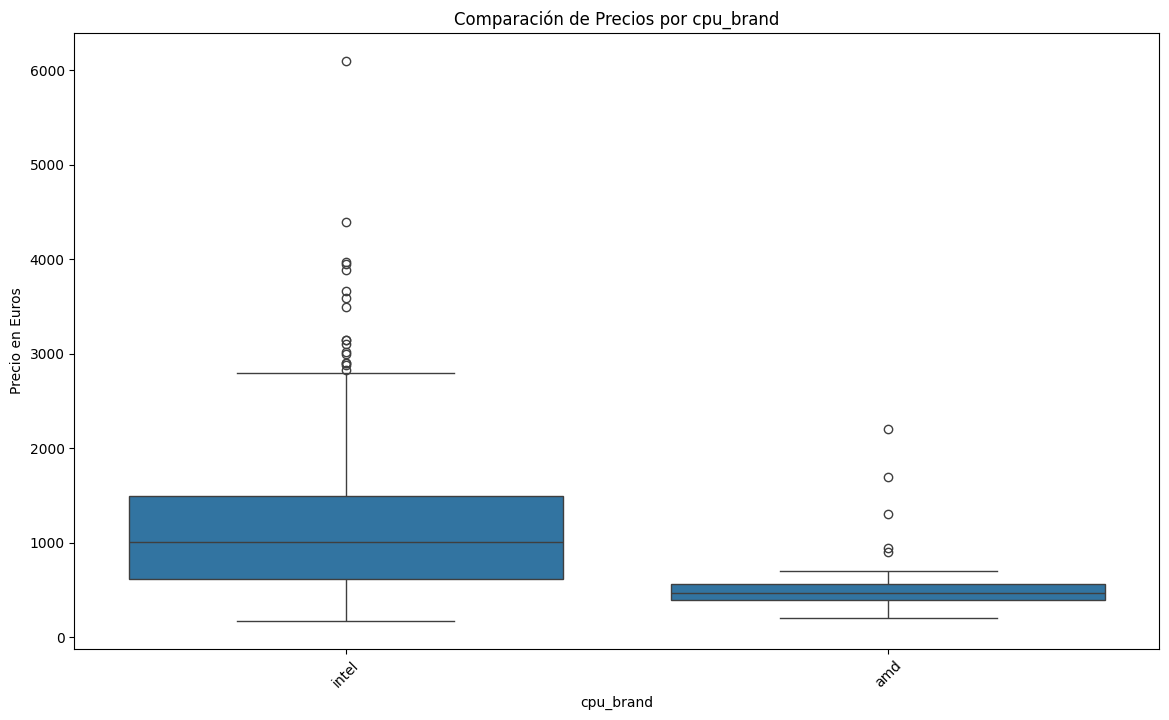

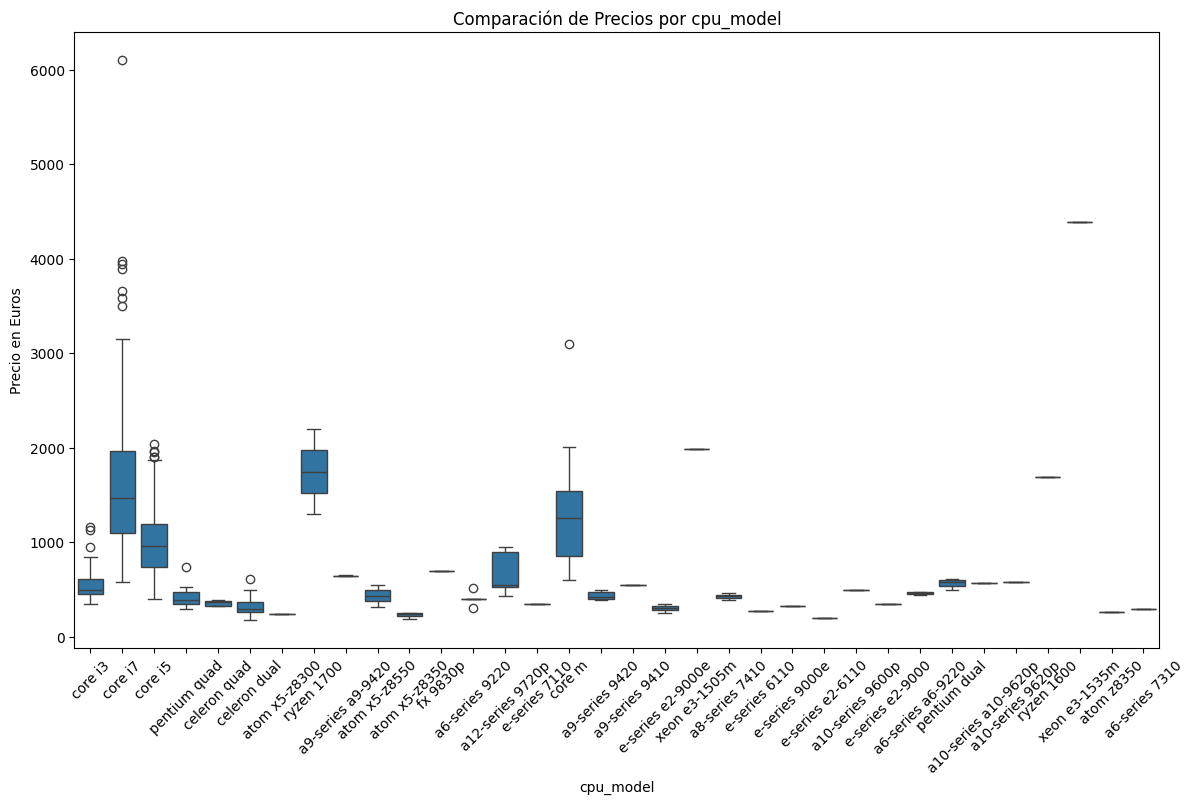

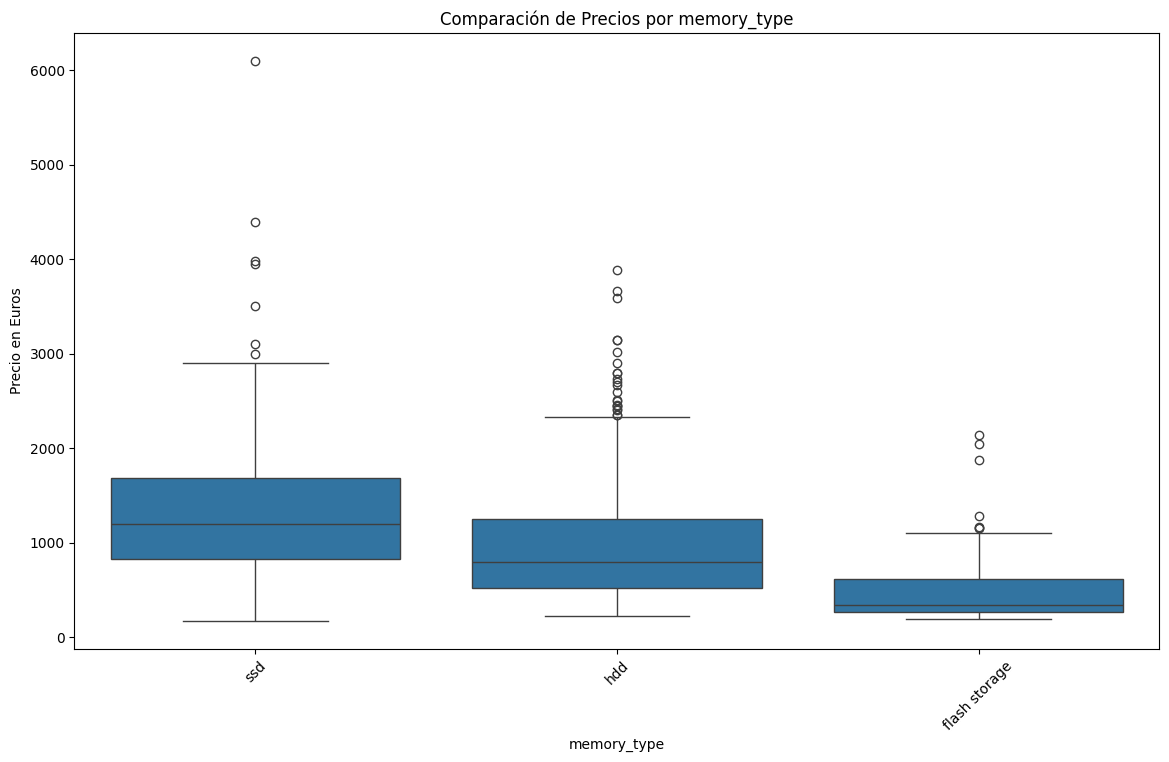

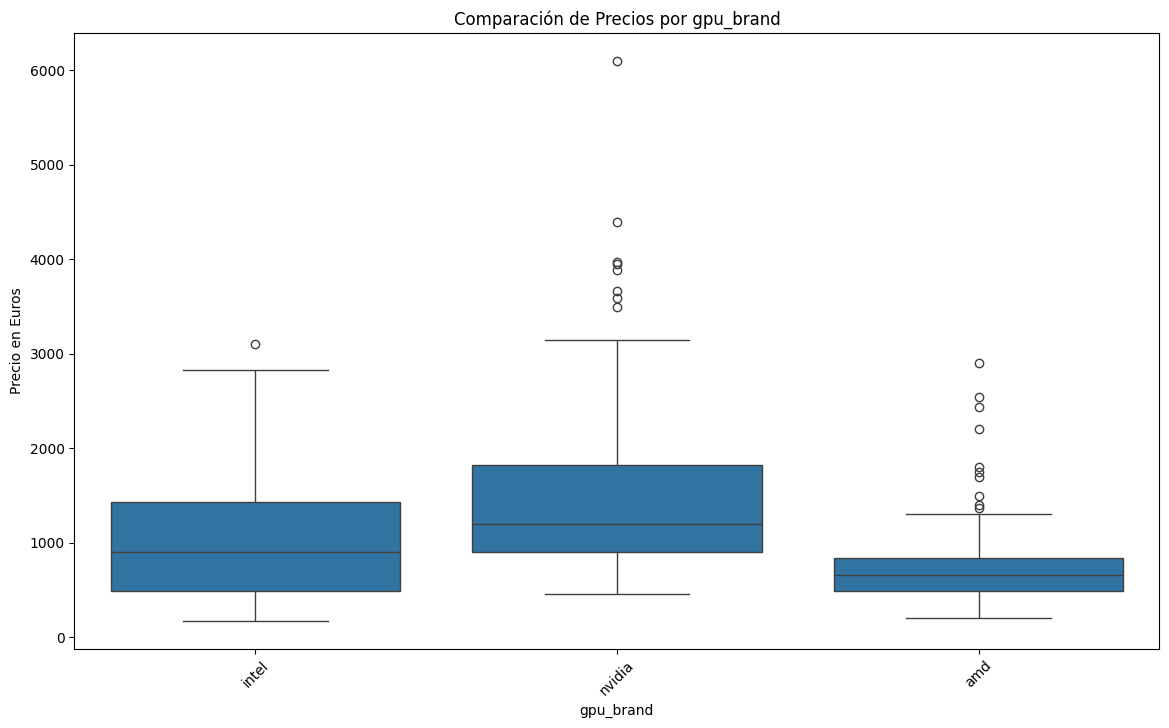

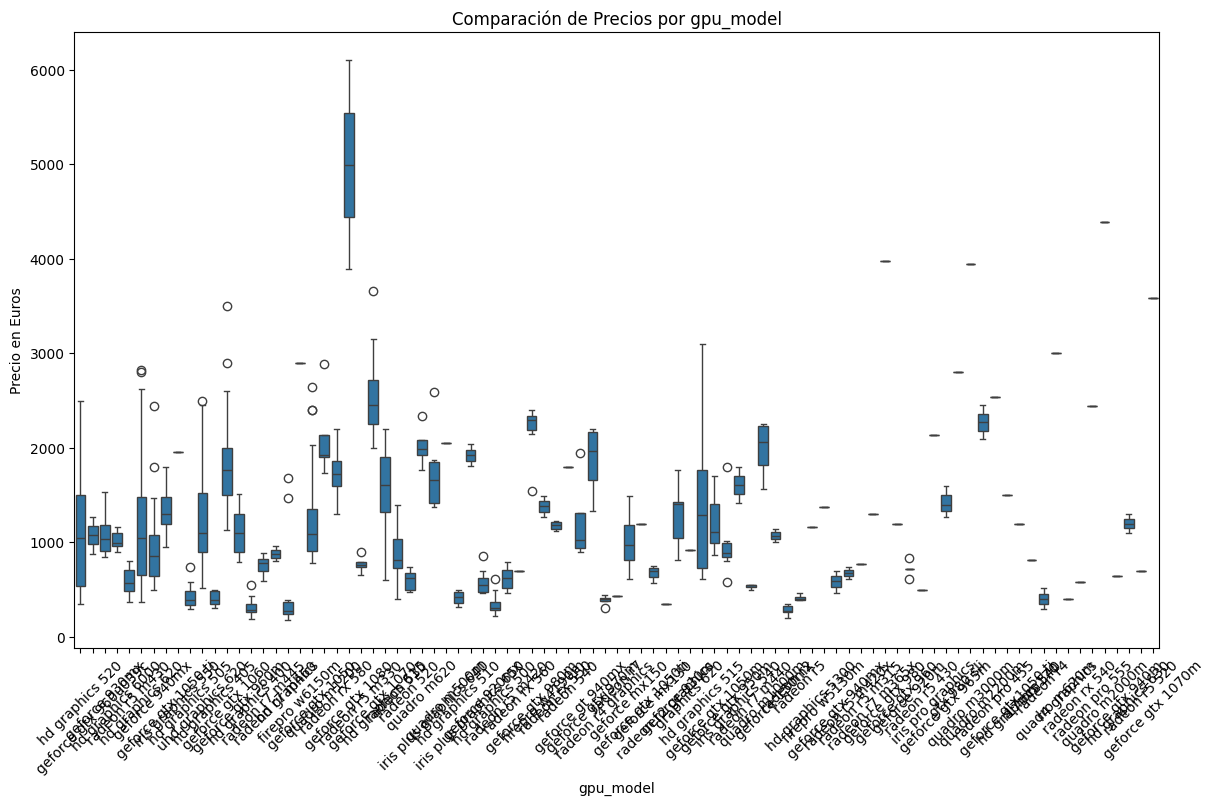

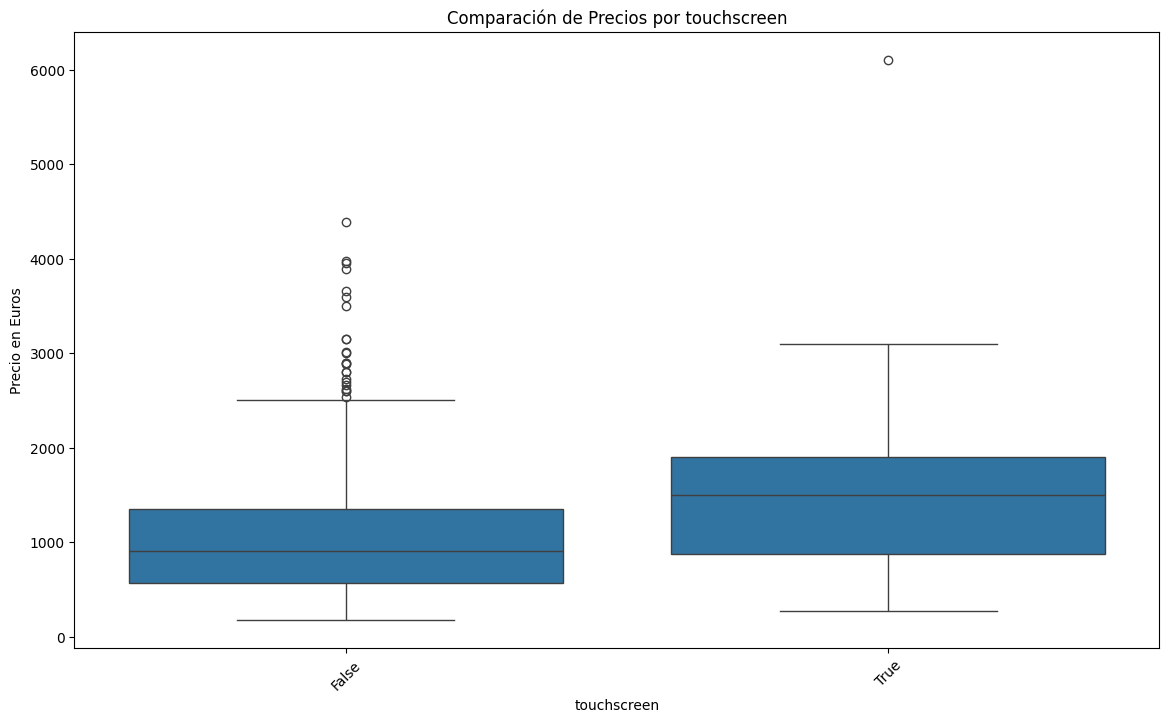

In [66]:
for var in features_cat:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=var, y='price_in_euros', data=df)
    plt.title(f'Comparación de Precios por {var}')
    plt.xlabel(var)
    plt.ylabel('Precio en Euros')
    plt.xticks(rotation=45)
    plt.show()


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


for var in features_cat:
    formula = f'price_in_euros ~ C({var})'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA resultados para {var}:\n", anova_table)


ANOVA resultados para company:
                   sum_sq     df         F        PR(>F)
C(company)  7.148738e+07   18.0  9.860403  1.870591e-25
Residual    3.596778e+08  893.0       NaN           NaN
ANOVA resultados para product:
                   sum_sq     df          F         PR(>F)
C(product)  3.910785e+08  446.0  10.171431  1.310782e-114
Residual    4.008667e+07  465.0        NaN            NaN
ANOVA resultados para typename:
                    sum_sq     df           F        PR(>F)
C(typename)  1.738114e+08    5.0  122.378754  5.614484e-99
Residual     2.573538e+08  906.0         NaN           NaN
ANOVA resultados para screenresolution:
                            sum_sq     df          F        PR(>F)
C(screenresolution)  1.700677e+08   29.0  19.810229  8.520782e-77
Residual             2.610976e+08  882.0        NaN           NaN
ANOVA resultados para opsys:
                 sum_sq     df          F        PR(>F)
C(opsys)  4.841127e+07    8.0  14.276592  1.028107e-19
Resid

In [68]:
# Convertimos las variables categoricas en dummies:

categorias_gd = features_cat


df_transformado = pd.get_dummies(df, columns=categorias_gd)

In [69]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_transformado[features_num] = scaler.fit_transform(df_transformado[features_num])

In [70]:
df_transformado = df_transformado.drop(columns=["ram", "weight", "cpu", "gpu", "memory"])

In [71]:
df_transformado.head()

,inches,price_in_euros,ram_gb,weight_kg,cpu_speed,memory_capacity,company_acer,company_apple,company_asus,company_chuwi,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
755,0.430676,539.00,-0.052193,-0.250996,-0.555076,-0.506740,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
618,0.430676,879.01,1.534472,0.846582,0.607868,1.644933,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
909,0.430676,900.00,-0.052193,0.019640,0.801691,1.644933,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.171072,898.94,-0.052193,-1.032831,-0.942724,-0.876920,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
286,0.430676,428.00,-0.845526,0.335381,-0.555076,1.644933,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [72]:
import pandas as pd

# Supongamos que df es tu DataFrame

# Función para identificar nombres de columnas problemáticos
def find_problematic_columns(columns):
    problematic_columns = [col for col in columns if any(char in col for char in ['[', ']', '<'])]
    return problematic_columns

# Identificar nombres de columnas problemáticos
problematic_columns = find_problematic_columns(df_transformado.columns)

print(f"Nombres de columnas problemáticos: {problematic_columns}")


Nombres de columnas problemáticos: []


## Modelado

### 1. Definir X e y

In [73]:
X = df_transformado.drop(['price_in_euros'], axis=1)
y = df_transformado['price_in_euros'].copy()
X.shape

(912, 649)

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Columns: 649 entries, inches to touchscreen_True
dtypes: bool(644), float64(5)
memory usage: 616.3 KB


In [75]:
X.shape

(912, 649)

In [76]:
y.shape

(912,)

In [77]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: price_in_euros, Length: 912, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
X_train

,inches,ram_gb,weight_kg,cpu_speed,memory_capacity,company_acer,company_apple,company_asus,company_chuwi,company_dell,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
1118,1.614577,-0.052193,1.463029,0.607868,1.644933,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
153,0.430676,1.534472,0.801476,0.995515,0.233620,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
275,-1.171072,-0.052193,-0.987726,1.189339,0.233620,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1100,-0.683584,-0.845526,-0.732125,0.026396,0.198916,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
131,1.614577,1.534472,1.162323,-0.942724,-0.506740,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,-1.330372,4.536966,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
996,0.430676,-0.448859,0.260205,2.546107,-0.506740,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
770,-1.728202,1.534472,-1.273396,0.995515,-0.506740,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
407,0.430676,-0.845526,0.260205,-2.299491,1.644933,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [80]:
X_test

,inches,ram_gb,weight_kg,cpu_speed,memory_capacity,company_acer,company_apple,company_asus,company_chuwi,company_dell,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
451,0.430676,-0.052193,0.260205,0.995515,-0.876920,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
802,0.430676,-0.052193,0.079781,0.414044,-0.506740,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
723,-0.683584,-0.052193,-0.235960,0.414044,-0.506740,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
682,-0.683584,-0.845526,-0.596808,0.220220,-0.876920,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1306,0.430676,-0.845526,0.260205,-1.330372,0.198916,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.430676,-0.052193,-0.250996,0.414044,1.644933,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
626,-2.354973,-0.845526,-1.168149,-1.330372,-1.154556,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,-2.354973,-1.242192,-1.318502,-2.299491,-1.154556,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546,-0.683584,-0.052193,-0.235960,0.801691,-0.506740,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [81]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: price_in_euros, Length: 729, dtype: float64

In [82]:
y_test

451     1099.00
802      959.00
723      857.07
682      699.00
1306     369.00
         ...   
369      639.00
626      379.00
416      304.45
546      859.00
260      949.00
Name: price_in_euros, Length: 183, dtype: float64

### 3. Baseline de modelos


In [85]:
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from sklearn.linear_model import LinearRegression



# Usar LinearRegression en lugar de LogisticRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)


LinearRegression()

In [86]:
from sklearn.linear_model import LogisticRegression


y_pred_test = lr_reg.predict(X_test)

In [87]:
X_test

,inches,ram_gb,weight_kg,cpu_speed,memory_capacity,company_acer,company_apple,company_asus,company_chuwi,company_dell,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
451,0.430676,-0.052193,0.260205,0.995515,-0.876920,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
802,0.430676,-0.052193,0.079781,0.414044,-0.506740,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
723,-0.683584,-0.052193,-0.235960,0.414044,-0.506740,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
682,-0.683584,-0.845526,-0.596808,0.220220,-0.876920,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1306,0.430676,-0.845526,0.260205,-1.330372,0.198916,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.430676,-0.052193,-0.250996,0.414044,1.644933,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
626,-2.354973,-0.845526,-1.168149,-1.330372,-1.154556,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,-2.354973,-1.242192,-1.318502,-2.299491,-1.154556,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
546,-0.683584,-0.052193,-0.235960,0.801691,-0.506740,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [88]:
y_pred = lr_reg.predict(X_test)

In [89]:
y_pred = y_pred

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [90]:
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)

9583352828387.99


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [ ]:
X_pred.Inches.value_counts()

Inches
15.6    212
17.3     51
13.3     50
14.0     47
12.5     12
11.6      5
12.3      3
13.9      3
12.0      2
10.1      2
15.4      1
17.0      1
13.5      1
15.0      1
Name: count, dtype: int64

In [ ]:
# 1️⃣ Convertir nombres de columnas a minúsculas y eliminar espacios
X_pred.columns = X_pred.columns.str.strip().str.lower()

# 2️⃣ Limpiar espacios extra y convertir valores de texto a minúsculas
X_pred = X_pred.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# 3️⃣ Reemplazar caracteres especiales (como "<U+039C>" en GPU)
X_pred['gpu'] = X_pred['gpu'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# 4️⃣ Convertir la columna 'price_in_euros' a numérica
#X_pred['price_in_euros'] = pd.to_numeric(X_pred['price_in_euros'], errors='coerce')

X_pred["inches"] = X_pred.inches.astype(float)
X_pred['ram_gb'] = X_pred['ram'].str.replace('gb', '').astype(int)
X_pred["weight_kg"] = X_pred['weight'].str.replace('kg', '').astype(float)
X_pred['touchscreen'] = X_pred['screenresolution'].apply(es_touchscreen)
X_pred['screenresolution'] = X_pred['screenresolution'].apply(extract_resolution)
X_pred['memory'] = X_pred['memory'].str.replace('1.0', '1', regex=False)
X_pred['gpu'] = X_pred['gpu'].str.strip()
X_pred['cpu_brand'] = X_pred['cpu'].apply(lambda x: x.split()[0])
X_pred['cpu_model'] = X_pred['cpu'].apply(lambda x: ' '.join(x.split()[1:3]))
X_pred['cpu_speed'] = X_pred['cpu'].apply(lambda x: x.split()[-1]).replace('ghz', '')).astype(float)
# Extracción de información de la memoria
X_pred['memory_type'] = X_pred['memory'].apply(lambda x: 'hdd' if 'hdd' in x else 'ssd' if 'ssd' in x else 'flash storage')
X_pred['memory_capacity'] = X_pred['memory'].apply(lambda x: x.split()[0].replace('gb', '').replace('tb', '000').strip()).astype(float)

# Extracción de información de la GPU
X_pred["gpu_brand"] = X_pred['gpu'].apply(lambda x: x.split()[0])
X_pred['gpu_model'] = X_pred['gpu'].apply(lambda x: ' '.join(x.split()[1:]))

C:\Users\josel\AppData\Local\Temp\ipykernel_23212\349208718.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_pred = X_pred.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [ ]:
categorias_gd = features_cat


X_pred_transformado = pd.get_dummies(X_pred, columns=categorias_gd)
X_pred_transformado[features_num] = scaler.fit_transform(X_pred_transformado[features_num])

In [ ]:
X_pred_transformado

,inches,cpu,ram,memory,gpu,weight,ram_gb,weight_kg,company_acer,company_apple,...,gpu_model_radeon r7 m360,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m465,gpu_model_radeon r9 m385,gpu_model_radeon rx 540,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
209,0.357415,intel core i7 7700hq 2.8ghz,16gb,512gb ssd,nvidia geforce gtx 1060,2.4kg,1.420931,0.502123,False,False,...,False,False,False,False,False,False,False,False,True,False
1281,0.357415,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,2.4kg,-0.902069,0.502123,True,False,...,False,False,False,False,False,False,False,False,True,False
1168,0.357415,intel core i3 6006u 2.0ghz,4gb,1tb hdd,intel hd graphics 520,1.9kg,-0.902069,-0.250117,False,False,...,False,False,False,False,False,False,False,False,True,False
1231,0.357415,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,2.191kg,-0.127735,0.187687,False,False,...,False,False,False,False,False,False,False,False,False,True
1020,-0.786899,intel core i5 7200u 2.5ghz,4gb,256gb ssd,intel hd graphics 620,1.95kg,-0.902069,-0.174893,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,intel core i7 7700hq 2.8ghz,16gb,512gb ssd + 1tb hdd,nvidia geforce gtx 1070,2.9kg,1.420931,1.254364,False,False,...,False,False,False,False,False,False,False,False,True,False
948,-0.786899,intel core i5 6200u 2.3ghz,4gb,128gb ssd,intel hd graphics 520,1.47kg,-0.902069,-0.897044,False,False,...,False,False,False,False,False,False,False,False,True,False
483,0.357415,intel core i7 7700hq 2.8ghz,8gb,256gb ssd,nvidia quadro m1200,1.78kg,-0.127735,-0.430655,False,False,...,False,False,False,False,False,False,False,False,True,False
1017,-0.786899,intel core i5 7200u 2.5ghz,4gb,500gb hdd,intel hd graphics 620,1.64kg,-0.902069,-0.641282,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X_pred_transformado = X_pred_transformado.drop(columns=["ram", "weight", "cpu", "gpu", "memory"])

In [ ]:
X_pred_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 454 entries, inches to touchscreen_True
dtypes: bool(451), float64(3)
memory usage: 184.4 KB


In [ ]:
X_pred_transformado


,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,gpu_model_radeon r7 m360,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m465,gpu_model_radeon r9 m385,gpu_model_radeon rx 540,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
209,0.357415,1.420931,0.502123,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1281,0.357415,-0.902069,0.502123,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1168,0.357415,-0.902069,-0.250117,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1231,0.357415,-0.127735,0.187687,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1020,-0.786899,-0.902069,-0.174893,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,1.420931,1.254364,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
948,-0.786899,-0.902069,-0.897044,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
483,0.357415,-0.127735,-0.430655,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1017,-0.786899,-0.902069,-0.641282,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X_train


,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
1118,1.614577,-0.052193,1.463029,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
153,0.430676,1.534472,0.801476,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
275,-1.171072,-0.052193,-0.987726,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1100,-0.683584,-0.845526,-0.732125,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
131,1.614577,1.534472,1.162323,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
996,0.430676,-0.448859,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
770,-1.728202,1.534472,-1.273396,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
407,0.430676,-0.845526,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Columnas de X_pred debe coincidir con X_train y los valores se rellenan a False
X_pred_transformado = X_pred_transformado.reindex(columns=X_train.columns, fill_value=False)

In [ ]:
X_pred_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 687 entries, inches to touchscreen_True
dtypes: bool(684), float64(3)
memory usage: 273.4 KB


In [ ]:
X_train

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
1118,1.614577,-0.052193,1.463029,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
153,0.430676,1.534472,0.801476,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
275,-1.171072,-0.052193,-0.987726,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1100,-0.683584,-0.845526,-0.732125,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
131,1.614577,1.534472,1.162323,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
996,0.430676,-0.448859,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
770,-1.728202,1.534472,-1.273396,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
407,0.430676,-0.845526,0.260205,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


 ## 2. Replicar el procesado para ``test.csv``

In [ ]:
X_pred_transformado

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,gpu_model_radeon r7 m440,gpu_model_radeon r7 m445,gpu_model_radeon r7 m460,gpu_model_radeon rx 540,gpu_model_radeon rx 550,gpu_model_radeon rx 560,gpu_model_radeon rx 580,gpu_model_uhd graphics 620,touchscreen_False,touchscreen_True
209,0.357415,1.420931,0.502123,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1281,0.357415,-0.902069,0.502123,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1168,0.357415,-0.902069,-0.250117,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1231,0.357415,-0.127735,0.187687,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1020,-0.786899,-0.902069,-0.174893,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,1.420931,1.254364,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
948,-0.786899,-0.902069,-0.897044,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
483,0.357415,-0.127735,-0.430655,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1017,-0.786899,-0.902069,-0.641282,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
predictions_submit = model.predict(X_pred_transformado)
predictions_submit

array([1509.2136 ,  275.2528 ,  388.55698,  678.77454,  945.0393 ,
        498.2558 ,  865.22314,  707.09863, 1045.2374 ,  327.12146,
       1471.2246 , 1125.6799 ,  497.683  , 1644.8452 ,  841.1981 ,
        778.9563 , 1993.5651 , 1152.0126 ,  870.8802 ,  600.60925,
       1181.9316 ,  291.6199 ,  673.41156, 1100.4803 ,  435.3162 ,
        608.0815 ,  495.58878,  497.52417, 1863.0831 , 1087.6401 ,
       1586.6028 ,  447.1963 ,  735.31335, 2335.9612 , 1901.8688 ,
       1169.424  ,  632.06537, 1251.971  ,  892.6834 , 1651.183  ,
        771.95526,  974.3184 ,  493.15906, 1323.6815 ,  994.0661 ,
        710.5151 ,  803.33105,  675.24335,  450.23135,  487.46332,
       1453.8517 ,  761.2457 ,  987.45514,  185.95305, 1205.1672 ,
       1623.9863 ,  631.87115,  926.94403,  704.03503,  516.0667 ,
       2412.5696 ,  897.8555 ,  514.7088 , 2171.099  ,  977.68634,
       1164.8213 ,  884.8513 ,  955.27026, 1702.6282 , 1480.5323 ,
        773.4711 ,  395.01468,  861.56256,  928.78986,  792.03

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

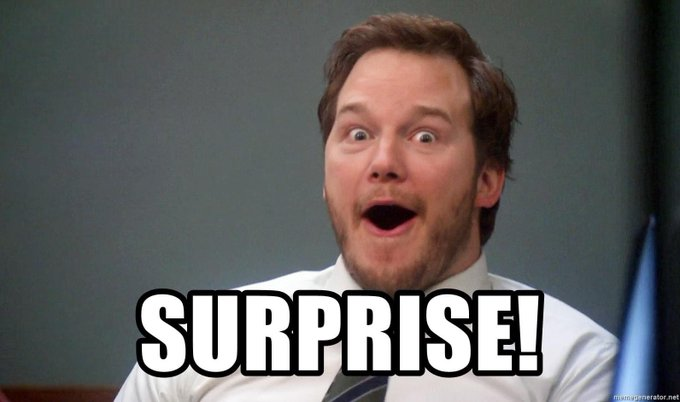

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [ ]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred_transformado.index,"Price_in_euros": predictions_submit})

In [ ]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1509.213623
1,1281,275.252808
2,1168,388.556976
3,1231,678.774536
4,1020,945.039307


In [ ]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [ ]:
chequeador(submission)

You're ready to submit!
